## Interactive Application for the Cranfield Search Engine

In [1]:
import argparse, sys, importlib
import matplotlib.pyplot as plt
%matplotlib inline

args = argparse.Namespace()

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interact_manual

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

print(color.GREEN + "CRANFIELD SEARCH ENGINE" + color.END)
print(color.PURPLE + "NLP Course Project by Emil Biju and Tony Fredrick" + color.END)

args.dataset="cranfield/"
args.out_folder='Output/'
args.k=200
display_limit=20
args.preprocess=False
args.custom=False
args.query=""

@interact
def get_model(segmenter=['punkt', 'naive']):
    args.segmenter=segmenter
    
@interact
def get_model(tokenizer=['ptb', 'naive']):
    args.tokenizer=tokenizer

@interact
def get_model(model=['vector_space', 'glove_weighted_tfidf', 'lsa', 'lsa_glove_weighted', 'lsa_wordnet_weighted', 'glove', 
                     'glove_sentence_wise', 'univ_sentence_enc']):
    args.model=model
    
custom = widgets.Button(description="Enter Custom Query")
output_custom = widgets.Output()

text_k = widgets.Text(
    value="200",
    placeholder='Enter k here!',
    description='k',
    disabled=False
)

display(text_k)
def callback_k(wdgt):
    # replace by something useful
    args.k = int(text_k.value)

text_k.on_submit(callback_k)

def on_custom_clicked(b):
  # Display the message within the output widget.
    args.custom=True
    print("Custom query mode activated!")
        
custom.on_click(on_custom_clicked)
display(custom, output_custom)


preprocess = widgets.Button(description="Preprocess @ runtime")
output_preproc = widgets.Output()

def on_preproc_clicked(b):
  # Display the message within the output widget.
    args.preprocess=True
    with output_preproc:
        print("Documents will be preprocessed at runtime")

preprocess.on_click(on_preproc_clicked)
display(preprocess, output_preproc)

CRANFIELD SEARCH ENGINE
NLP Course Project by Emil Biju and Tony Fredrick


interactive(children=(Dropdown(description='segmenter', options=('punkt', 'naive'), value='punkt'), Output()),…

interactive(children=(Dropdown(description='tokenizer', options=('ptb', 'naive'), value='ptb'), Output()), _do…

interactive(children=(Dropdown(description='model', options=('vector_space', 'glove_weighted_tfidf', 'lsa', 'l…

Text(value='200', description='k', placeholder='Enter k here!')

Button(description='Enter Custom Query', style=ButtonStyle())

Output()

Button(description='Preprocess @ runtime', style=ButtonStyle())

Output()

Custom query mode activated!


In [2]:
if not 'main' in sys.modules:
    import main
else:
    importlib.reload(main) 
from main import SearchEngine
searchEngine= SearchEngine(args)
# searchEngine.evaluate_autocomplete()
if args.custom:
    searchEngine.handleCustomQuery()
else:
    searchEngine.evaluateDataset() 

Enter your query here: flw solutions
Time taken for spell check = 3.783886194229126 seconds.
Did you mean: fl solutions? (y/n/enter a fresh query)
flow solutions
----------------------------------------------------------
***Inverted index loaded from memory***
Time taken to load the inverted index from memory: 0.14536809921264648 seconds
----------------------------------------------------------

Candidate queries for autocompletion:

0 flow solutions (Your original query) 

1 what approximate solutions are known to the direct problem of transonic flow in the throat of a nozzle,  i.e. finding the flow in a given nozzle . (Query ID: 168) 

2 can the procedure of matching inner and outer solutions for a viscous flow problem be applied when the main stream is a shear flow . (Query ID: 66) 

3 what approximate solutions are known to the indirect problem of transonic flow in the throat of a nozzle,  i.e. finding a nozzle which has a given axial velocity distribution . (Query ID: 169) 

4 ca

In [ ]:
USE sent wise
***Inverted index loaded from memory***
Time taken to load the inverted index from memory: 0.10146212577819824 seconds
----------------------------------------------------------
USE model loaded successfully!
Time taken to rank the documents using Universal Sentence Encoder: 195.63679599761963 seconds
----------------------------------------------------------
Precision, Recall and F-score @ 1 : 0.5155555555555555, 0.0854001739852314, 0.14111390361414264
MAP, nDCG @ 1 : 0.5155555555555555, 0.4211111111111111
Precision, Recall and F-score @ 2 : 0.3888888888888889, 0.1287151591949534, 0.18331512269990016
MAP, nDCG @ 2 : 0.5577777777777778, 0.3655022034818588
Precision, Recall and F-score @ 3 : 0.33629629629629626, 0.16125132940503578, 0.20418853184557972
MAP, nDCG @ 3 : 0.5714814814814811, 0.3451787856753093
Precision, Recall and F-score @ 4 : 0.29777777777777775, 0.1846201951072348, 0.21200777697556328
MAP, nDCG @ 4 : 0.5712345679012345, 0.33386459992796536
Precision, Recall and F-score @ 5 : 0.26666666666666694, 0.20673745694288762, 0.21592530210301103
MAP, nDCG @ 5 : 0.5641234567901233, 0.3278963895653381
Precision, Recall and F-score @ 6 : 0.24222222222222223, 0.21951708426431052, 0.21277145547613285
MAP, nDCG @ 6 : 0.5576395061728396, 0.32471551865351594
Precision, Recall and F-score @ 7 : 0.22222222222222238, 0.23461043801906767, 0.21063975502633955
MAP, nDCG @ 7 : 0.5512068783068781, 0.3244590183533623
Precision, Recall and F-score @ 8 : 0.20944444444444443, 0.25033326258309013, 0.21037173849775723
MAP, nDCG @ 8 : 0.5446908289241621, 0.3262572731463288
Precision, Recall and F-score @ 9 : 0.19555555555555548, 0.2623553580516466, 0.20685644898479016
MAP, nDCG @ 9 : 0.5371231922398587, 0.32792991664174276
Precision, Recall and F-score @ 10 : 0.18488888888888902, 0.2721715850345402, 0.20332048337034325
MAP, nDCG @ 10 : 0.532211816578483, 0.3306166913589971
Time taken to evaluate = 8.104618072509766 seconds

In [ ]:
with normalization

0 flow solutions (Your original query) 

1 previous solutions to the boundary layer similarity equations . (Query ID: 70) 

2 what approximate solutions are known to the direct problem of transonic flow in the throat of a nozzle,  i.e. finding the flow in a given nozzle . (Query ID: 168) 

3 can the procedure of matching inner and outer solutions for a viscous flow problem be applied when the main stream is a shear flow . (Query ID: 66) 

4 what is known regarding asymptotic solutions to the exact boundary layer equations . (Query ID: 69) 

5 what general solutions for the stresses in pressurized shells of revolution are available . (Query ID: 143) 

In [ ]:
no normlalization
0 flow solutions (Your original query) 

1 what approximate solutions are known to the direct problem of transonic flow in the throat of a nozzle,  i.e. finding the flow in a given nozzle . (Query ID: 168) 

2 can the procedure of matching inner and outer solutions for a viscous flow problem be applied when the main stream is a shear flow . (Query ID: 66) 

3 what approximate solutions are known to the indirect problem of transonic flow in the throat of a nozzle,  i.e. finding a nozzle which has a given axial velocity distribution . (Query ID: 169) 

4 can a criterion be developed to show empirically the validity of flow solutions for chemically reacting gas mixtures based on the simplifying assumption of instantaneous local chemical equilibrium . (Query ID: 4) 

5 in the problem of the buckling strength of uniform circular cylinders loaded in axial compression,  does the linear solution help with improving the non-linear one . (Query ID: 195) 

In [ ]:
0 flow solutions (Your original query) 

1 previous solutions to the boundary layer similarity equations . (Query ID: 70) 

2 solution of the blasius problem with three-point boundary conditions . (Query ID: 172) 

3 what general solutions for the stresses in pressurized shells of revolution are available . (Query ID: 143) 

4 what analytical solutions are available for stresses in edge-loaded shells of revolution . (Query ID: 141) 

5 can the procedure of matching inner and outer solutions for a viscous flow problem be applied when the main stream is a shear flow . (Query ID: 66) 








0 laminar boundary (Your original query) 

1 what are the physical significance and characteristics of separated laminar and turbulent boundary layer flows . (Query ID: 209) 

2 has anyone investigated theoretically whether surface flexibility can stabilize a laminar boundary layer . (Query ID: 205) 

3 what is a single approximate formula for the displacement thickness of a laminar boundary layer in compressible flow on a flat plate . (Query ID: 26) 

4 find a calculation procedure applicable to all incompressible laminar boundary layer flow problems having good accuracy and reasonable computation time . (Query ID: 220) 

5 what accurate or exact solutions of the laminar separation point for various incompressible and compressible boundary layers with zero heat transfer are available . (Query ID: 162) 

In [ ]:
Precision, Recall and F-score @ 1 : 0.6711111111111111, 0.10766380573245449, 0.17813631673975494
MAP, nDCG @ 1 : 0.6711111111111111, 0.5244444444444445
Precision, Recall and F-score @ 2 : 0.5644444444444444, 0.18232303161913146, 0.2590092014035358
MAP, nDCG @ 2 : 0.7066666666666667, 0.48890736739973806
Precision, Recall and F-score @ 3 : 0.48740740740740734, 0.23013982062944038, 0.2909316029191042
MAP, nDCG @ 3 : 0.7085185185185185, 0.46214576345013403
Precision, Recall and F-score @ 4 : 0.44222222222222224, 0.2721660986361105, 0.31276399228051993
MAP, nDCG @ 4 : 0.6986419753086421, 0.4534930468093099
Precision, Recall and F-score @ 5 : 0.40000000000000013, 0.3018506797671527, 0.3186186955710087
MAP, nDCG @ 5 : 0.6915740740740742, 0.4459713427361913
Precision, Recall and F-score @ 6 : 0.37333333333333346, 0.33115019079877994, 0.3251711721078297
MAP, nDCG @ 6 : 0.6788827160493829, 0.44946875628455524
Precision, Recall and F-score @ 7 : 0.3434920634920637, 0.3501742988746122, 0.32141993660361
MAP, nDCG @ 7 : 0.6683245149911818, 0.4498393105115993
Precision, Recall and F-score @ 8 : 0.3227777777777778, 0.3733769128909517, 0.32096536680643517
MAP, nDCG @ 8 : 0.6605954144620811, 0.4538090348016417
Precision, Recall and F-score @ 9 : 0.303703703703704, 0.39405691144607957, 0.3185757746244974
MAP, nDCG @ 9 : 0.6500589254220206, 0.4580836168590858
Precision, Recall and F-score @ 10 : 0.28577777777777796, 0.41164803892226454, 0.31322232617744145
MAP, nDCG @ 10 : 0.6409280059348841, 0.46213809247875337
Time taken to evaluate = 8.865531921386719 seconds

In [8]:
import numpy as np
sing_vals = np.load('/Users/emilbiju/Google Drive (ee17b071@smail.iitm.ac.in)/NLP2021_Project/Py_final_code/EE17B071_EE17B154_code/IntermediateResults/Singular_values.npy')

In [9]:
sing_vals.shape

(1398,)

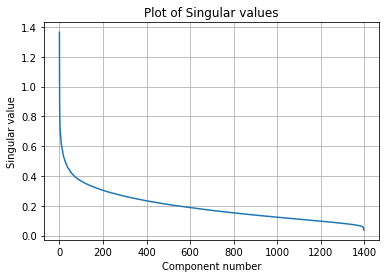

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(sing_vals)
plt.title("Plot of Singular values")
plt.xlabel("Component number")
plt.ylabel("Singular value")
plt.grid(True)
plt.savefig("nlp_1.pdf", bbox_inches='tight')

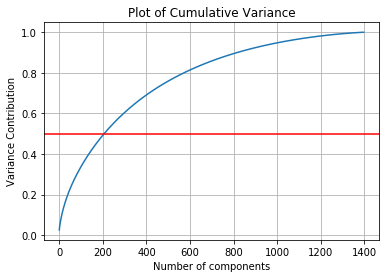

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.cumsum(np.square(sing_vals)/np.sum(np.square(sing_vals))))
plt.title("Plot of Cumulative Variance")
plt.xlabel("Number of components")
plt.ylabel("Variance Contribution")
plt.grid(True)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.savefig("nlp_2.pdf", bbox_inches='tight')

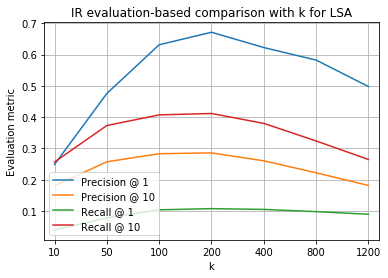

In [26]:
prec_arr = np.array([0.24888888888888888, 0.47555555555555556, 0.6311111111111111, 0.6711111111111111, 0.6222222222222222,0.5822222222222222,0.49777777777777776])
map_arr = np.array([0.34010076635592495, 0.5286242539402594, 0.6157265159150079, 0.6409280059348841, 0.6247981985386742, 0.5869698286722098,0.5301340094062313])
prec_10_arr = np.array([0.1808888888888889,0.2573333333333334,0.2831111111111112,0.28577777777777796,0.26044444444444453,0.22222222222222238,0.18177777777777795])
rec_arr = np.array([0.03973415038120919, 0.07809648508154253, 0.1039047645786765, 0.10766380573245449, 0.10518877697236825, 0.09813280690671881, 0.08982621091126836])
rec_10_arr = np.array([0.2567016746337092,0.37323148349501506,0.4071538180111186,0.41164803892226454,0.37998777326199856,0.323942339127461,0.264715369593246])
plt.plot(prec_arr, label="Precision @ 1")
plt.plot(prec_10_arr, label="Precision @ 10")
plt.plot(rec_arr, label="Recall @ 1")
plt.plot(rec_10_arr, label="Recall @ 10")
plt.xticks([0,1,2,3,4,5,6,7],[10,50,100,200,400,800,1200])
plt.xlim([-0.2,6.2])
plt.title("IR evaluation-based comparison with k for LSA")
plt.xlabel("k")
plt.ylabel("Evaluation metric")
plt.grid(True)
plt.legend(loc='lower left')
plt.savefig("nlp_3.pdf", bbox_inches='tight')

In [13]:
10
Time taken to do SVD = 11.778558015823364 seconds
Time taken to rank the documents using LSA: 54.55981183052063 seconds
Precision, Recall and F-score @ 1 : 0.24888888888888888, 0.03973415038120919, 0.066096862557886
MAP, nDCG @ 1 : 0.24888888888888888, 0.17666666666666667
Precision, Recall and F-score @ 10 : 0.1808888888888889, 0.2567016746337092, 0.19806882409989873
MAP, nDCG @ 10 : 0.34010076635592495, 0.23802592599723293
Time taken to evaluate = 6.98173713684082 seconds

50
Time taken to load SVD results = 4.512508153915405 seconds
Time taken to rank the documents using LSA: 16.45491886138916 seconds
Precision, Recall and F-score @ 1 : 0.47555555555555556, 0.07809648508154253, 0.128835482943842
MAP, nDCG @ 1 : 0.47555555555555556, 0.3622222222222222
Precision, Recall and F-score @ 10 : 0.2573333333333334, 0.37323148349501506, 0.28361252258262376
MAP, nDCG @ 10 : 0.5286242539402594, 0.38492541868651264

100
Time taken to load SVD results = 4.5370402336120605 seconds
Time taken to rank the documents using LSA: 17.25211215019226 seconds
Precision, Recall and F-score @ 1 : 0.6311111111111111, 0.1039047645786765, 0.1713694386491083
MAP, nDCG @ 1 : 0.6311111111111111, 0.5
Precision, Recall and F-score @ 10 : 0.2831111111111112, 0.4071538180111186, 0.3103759691741526
MAP, nDCG @ 10 : 0.6157265159150079, 0.4511924052750425


200
Precision, Recall and F-score @ 1 : 0.6711111111111111, 0.10766380573245449, 0.17813631673975494
MAP, nDCG @ 1 : 0.6711111111111111, 0.5244444444444445
Precision, Recall and F-score @ 10 : 0.28577777777777796, 0.41164803892226454, 0.31322232617744145
MAP, nDCG @ 10 : 0.6409280059348841, 0.46213809247875337
    
400
Time taken to load SVD results = 4.761127233505249 seconds
Time taken to rank the documents using LSA: 25.1976158618927 seconds
Precision, Recall and F-score @ 1 : 0.6222222222222222, 0.10518877697236825, 0.17282729035670208
MAP, nDCG @ 1 : 0.6222222222222222, 0.5044444444444445
Precision, Recall and F-score @ 10 : 0.26044444444444453, 0.37998777326199856, 0.2860623987227776
MAP, nDCG @ 10 : 0.6247981985386742, 0.43672970971101704

800
Time taken to load SVD results = 4.4721519947052 seconds
Time taken to rank the documents using LSA: 29.505162954330444 seconds
Precision, Recall and F-score @ 1 : 0.5822222222222222, 0.09813280690671881, 0.1615357366830346
MAP, nDCG @ 1 : 0.5822222222222222, 0.4711111111111111
Precision, Recall and F-score @ 10 : 0.22222222222222238, 0.323942339127461, 0.24347886005690805
MAP, nDCG @ 10 : 0.5869698286722098, 0.3811910853753262
    

1200
Time taken to load SVD results = 4.9876768589019775 seconds
Time taken to rank the documents using LSA: 47.49492883682251 seconds
Precision, Recall and F-score @ 1 : 0.49777777777777776, 0.08982621091126836, 0.14670081924027398
MAP, nDCG @ 1 : 0.49777777777777776, 0.40444444444444444
Precision, Recall and F-score @ 10 : 0.18177777777777795, 0.264715369593246, 0.19835126028557726
MAP, nDCG @ 10 : 0.5301340094062313, 0.3198885071753587

SyntaxError: invalid syntax (<ipython-input-13-6052bc9aa5e1>, line 2)

In [ ]:
Time taken to preprocess queries: 2.9574379920959473 seconds
----------------------------------------------------------
Time taken to segment sentences = 0.5791921615600586 s
Time taken to tokenize = 1.5343031883239746 s
Time taken to do inflection reduction = 24.70096206665039 s
Time taken to remove stopwords = 1.2398571968078613 s
Time taken to preprocess documents: 28.082806825637817 seconds
----------------------------------------------------------
***Inverted index built and saved at runtime***
Time taken to build and save the inverted index: 1.004967212677002 seconds
----------------------------------------------------------
Time taken to build the TF-IDF matrix in LSA = 0.18627572059631348 seconds
Number of latent dimensions used = 200
Calculating SVD at run-time.
Time taken to do SVD = 19.23528504371643 seconds
Time taken to rank the documents using LSA: 60.42736291885376 seconds

In [ ]:
Number of latent dimensions used = 200
Found SVD results stored in the folder.
Time taken to rank the documents using LSA: 20.077213048934937 seconds
----------------------------------------------------------
Precision, Recall and F-score @ 1 : 0.6711111111111111, 0.10766380573245449, 0.17813631673975494
MAP, nDCG @ 1 : 0.6711111111111111, 0.5244444444444445
Precision, Recall and F-score @ 2 : 0.5644444444444444, 0.18232303161913146, 0.2590092014035358
MAP, nDCG @ 2 : 0.7066666666666667, 0.48890736739973806
Precision, Recall and F-score @ 3 : 0.48740740740740734, 0.23013982062944038, 0.2909316029191042
MAP, nDCG @ 3 : 0.7085185185185185, 0.46214576345013403
Precision, Recall and F-score @ 4 : 0.44222222222222224, 0.2721660986361105, 0.31276399228051993
MAP, nDCG @ 4 : 0.6986419753086421, 0.4534930468093099
Precision, Recall and F-score @ 5 : 0.40000000000000013, 0.3018506797671527, 0.3186186955710087
MAP, nDCG @ 5 : 0.6915740740740742, 0.4459713427361913
Precision, Recall and F-score @ 6 : 0.37333333333333346, 0.33115019079877994, 0.3251711721078297
MAP, nDCG @ 6 : 0.6788827160493829, 0.44946875628455524
Precision, Recall and F-score @ 7 : 0.3434920634920637, 0.3501742988746122, 0.32141993660361
MAP, nDCG @ 7 : 0.6683245149911818, 0.4498393105115993
Precision, Recall and F-score @ 8 : 0.3227777777777778, 0.3733769128909517, 0.32096536680643517
MAP, nDCG @ 8 : 0.6605954144620811, 0.4538090348016417
Precision, Recall and F-score @ 9 : 0.303703703703704, 0.39405691144607957, 0.3185757746244974
MAP, nDCG @ 9 : 0.6500589254220206, 0.4580836168590858
Precision, Recall and F-score @ 10 : 0.28577777777777796, 0.41164803892226454, 0.31322232617744145
MAP, nDCG @ 10 : 0.6409280059348841, 0.46213809247875337
Time taken to evaluate = 6.960665941238403 seconds

In [ ]:
0.9

Precision, Recall and F-score @ 1 : 0.5955555555555555, 0.10153919850464808, 0.16715903268844437
MAP, nDCG @ 1 : 0.5955555555555555, 0.4855555555555556
Precision, Recall and F-score @ 2 : 0.49333333333333335, 0.16206082780986877, 0.22974901854342178
MAP, nDCG @ 2 : 0.6377777777777778, 0.4465734005356111
Precision, Recall and F-score @ 3 : 0.437037037037037, 0.20864005133555338, 0.2635573422354953
MAP, nDCG @ 3 : 0.6507407407407408, 0.4234317002952081
Precision, Recall and F-score @ 4 : 0.3933333333333333, 0.24283302199397358, 0.27830301416736575
MAP, nDCG @ 4 : 0.6483950617283949, 0.41377775930032124
Precision, Recall and F-score @ 5 : 0.3537777777777781, 0.2680866079142263, 0.28258082872110774
MAP, nDCG @ 5 : 0.6437901234567901, 0.40580348813341316
Precision, Recall and F-score @ 6 : 0.3318518518518518, 0.2984259725333853, 0.29060083357962896
MAP, nDCG @ 6 : 0.6367407407407407, 0.4097841284076617
Precision, Recall and F-score @ 7 : 0.3098412698412699, 0.318776013476946, 0.29077112462603855
MAP, nDCG @ 7 : 0.6237467372134038, 0.41117558249043323
Precision, Recall and F-score @ 8 : 0.2827777777777778, 0.3297868532544525, 0.28187069503089596
MAP, nDCG @ 8 : 0.6187013101536912, 0.410503721660544
Precision, Recall and F-score @ 9 : 0.2637037037037039, 0.3428846975803668, 0.2763575843621133
MAP, nDCG @ 9 : 0.6162360922146637, 0.4140725893235317
Precision, Recall and F-score @ 10 : 0.25066666666666687, 0.3604382181338874, 0.274595285304007
MAP, nDCG @ 10 : 0.6014670319979843, 0.4179697805575174

In [ ]:
Precision, Recall and F-score @ 2 : 0.4888888888888889, 0.1603222034712444, 0.22754325722654936
MAP, nDCG @ 2 : 0.6311111111111111, 0.4411072692855834
Precision, Recall and F-score @ 3 : 0.43259259259259253, 0.2066294693249713, 0.26079191013672987
MAP, nDCG @ 3 : 0.644814814814815, 0.4187610330678166
Precision, Recall and F-score @ 4 : 0.39222222222222225, 0.2410076251685768, 0.27671330757765916
MAP, nDCG @ 4 : 0.6419753086419754, 0.41100896613302573
Precision, Recall and F-score @ 5 : 0.3537777777777781, 0.2671254086196937, 0.2819532500543134
MAP, nDCG @ 5 : 0.6397407407407408, 0.40377085380949185
Precision, Recall and F-score @ 6 : 0.331111111111111, 0.29731662509070456, 0.28965274463154
MAP, nDCG @ 6 : 0.6332962962962964, 0.40752666326987397
Precision, Recall and F-score @ 7 : 0.30730158730158746, 0.3157971774981101, 0.28803445388936777
MAP, nDCG @ 7 : 0.620372839506173, 0.4077632159121053
Precision, Recall and F-score @ 8 : 0.2822222222222222, 0.32893147406573997, 0.2811713486256672
MAP, nDCG @ 8 : 0.6142533383723862, 0.40821904934117165
Precision, Recall and F-score @ 9 : 0.2637037037037039, 0.34252314555214813, 0.2762014478334277
MAP, nDCG @ 9 : 0.6119115772234822, 0.412052335368136
Precision, Recall and F-score @ 10 : 0.24933333333333352, 0.3585334562291255, 0.2730266578530266
MAP, nDCG @ 10 : 0.5981504535147393, 0.41538551144667574

In [ ]:
1500

Precision, Recall and F-score @ 1 : 0.6622222222222223, 0.11254294842212344, 0.18514498708175864
MAP, nDCG @ 1 : 0.6622222222222223, 0.5355555555555556
Precision, Recall and F-score @ 2 : 0.5555555555555556, 0.18322128957033057, 0.25889853980405403
MAP, nDCG @ 2 : 0.7111111111111111, 0.4936105904448212
Precision, Recall and F-score @ 3 : 0.4844444444444445, 0.23106211133800553, 0.29081824650323956
MAP, nDCG @ 3 : 0.7151851851851851, 0.46400805242729776
Precision, Recall and F-score @ 4 : 0.43333333333333335, 0.26748788622923, 0.30584753648200286
MAP, nDCG @ 4 : 0.7053086419753087, 0.45174872060949567
Precision, Recall and F-score @ 5 : 0.3911111111111113, 0.29597453102960036, 0.3112288122898973
MAP, nDCG @ 5 : 0.6964691358024689, 0.4433391490030031
Precision, Recall and F-score @ 6 : 0.3666666666666665, 0.32814458347944714, 0.31978818618301813
MAP, nDCG @ 6 : 0.6903716049382714, 0.44756029488142063
Precision, Recall and F-score @ 7 : 0.3415873015873017, 0.34963199816038165, 0.3192198027061463
MAP, nDCG @ 7 : 0.6787329805996472, 0.4484336703812822
Precision, Recall and F-score @ 8 : 0.31444444444444447, 0.36243459194803285, 0.3108593330114037
MAP, nDCG @ 8 : 0.6670517510707985, 0.4489309820982525
Precision, Recall and F-score @ 9 : 0.2962962962962965, 0.3825799484071148, 0.3089026877532023
MAP, nDCG @ 9 : 0.6603001133786846, 0.4550506366671325
Precision, Recall and F-score @ 10 : 0.2768888888888891, 0.3943665052550753, 0.3012717590111144
MAP, nDCG @ 10 : 0.6492618753674305, 0.45655449570406886

In [ ]:
Precision, Recall and F-score @ 1 : 0.6577777777777778, 0.11106146694064196, 0.18292276485953643
MAP, nDCG @ 1 : 0.6577777777777778, 0.5311111111111111
Precision, Recall and F-score @ 2 : 0.5555555555555556, 0.18322128957033057, 0.25889853980405403
MAP, nDCG @ 2 : 0.7088888888888889, 0.4924971535756058
Precision, Recall and F-score @ 3 : 0.48296296296296304, 0.23017322244911662, 0.28970713539212845
MAP, nDCG @ 3 : 0.7129629629629629, 0.4629475741243986
Precision, Recall and F-score @ 4 : 0.43333333333333335, 0.26723391797526175, 0.3056679629690961
MAP, nDCG @ 4 : 0.7030864197530865, 0.45074885792647906
Precision, Recall and F-score @ 5 : 0.3920000000000001, 0.29612778773458115, 0.31149025019839405
MAP, nDCG @ 5 : 0.6949814814814812, 0.44306905921880235
Precision, Recall and F-score @ 6 : 0.36592592592592577, 0.32792236125722496, 0.31944630584113776
MAP, nDCG @ 6 : 0.6889827160493824, 0.44598474811479866
Precision, Recall and F-score @ 7 : 0.3415873015873017, 0.3492952978236813, 0.3190298691828794
MAP, nDCG @ 7 : 0.6749864197530862, 0.44730835829265286
Precision, Recall and F-score @ 8 : 0.31444444444444447, 0.362640941154382, 0.3110076414930456
MAP, nDCG @ 8 : 0.6649891408415215, 0.4479577423193222
Precision, Recall and F-score @ 9 : 0.2967901234567903, 0.3835781847386845, 0.3095541010628917
MAP, nDCG @ 9 : 0.6589538548752832, 0.45417322122687565
Precision, Recall and F-score @ 10 : 0.27733333333333354, 0.3962165217103548, 0.3021672534698274
MAP, nDCG @ 10 : 0.6478200764256316, 0.45624242783979296
Time taken to evaluate = 6.712275981903076 seconds

In [ ]:
self.V

Precision, Recall and F-score @ 1 : 0.6622222222222223, 0.11254294842212344, 0.18514498708175864
MAP, nDCG @ 1 : 0.6622222222222223, 0.5355555555555556
Precision, Recall and F-score @ 2 : 0.5555555555555556, 0.18373980808884904, 0.2595334604389747
MAP, nDCG @ 2 : 0.7088888888888889, 0.4948540780297198
Precision, Recall and F-score @ 3 : 0.4874074074074075, 0.2323584076343018, 0.29261398163230806
MAP, nDCG @ 3 : 0.7137037037037037, 0.46530217539441526
Precision, Recall and F-score @ 4 : 0.43555555555555553, 0.2679534946948384, 0.3067104344677079
MAP, nDCG @ 4 : 0.707530864197531, 0.4532237873562653
Precision, Recall and F-score @ 5 : 0.3902222222222224, 0.2950856421407114, 0.31033992340100836
MAP, nDCG @ 5 : 0.6993580246913579, 0.4433516117961978
Precision, Recall and F-score @ 6 : 0.36444444444444424, 0.32638091504911215, 0.31783503645209066
MAP, nDCG @ 6 : 0.6924074074074072, 0.4466614728285158
Precision, Recall and F-score @ 7 : 0.3415873015873017, 0.34963199816038165, 0.3192198027061463
MAP, nDCG @ 7 : 0.6795871252204585, 0.4489919635640776
Precision, Recall and F-score @ 8 : 0.3138888888888889, 0.3627754337371505, 0.31091731306938375
MAP, nDCG @ 8 : 0.6676125976316453, 0.4495426646799336
Precision, Recall and F-score @ 9 : 0.29580246913580266, 0.3821050542752334, 0.30846335412501413
MAP, nDCG @ 9 : 0.660492441421013, 0.45562331459696703
Precision, Recall and F-score @ 10 : 0.27733333333333354, 0.3948137776506235, 0.3017218401923784
MAP, nDCG @ 10 : 0.6487493533215755, 0.4569745087760134
Time taken to evaluate = 7.689490795135498 seconds

In [4]:
634,360,284,11,753

(634, 360, 284, 11, 753)

In [ ]:
Precision, Recall and F-score @ 1 : 0.6622222222222223, 0.11254294842212344, 0.18514498708175864
MAP, nDCG @ 1 : 0.6622222222222223, 0.5344444444444445
Precision, Recall and F-score @ 2 : 0.5555555555555556, 0.18373980808884904, 0.2595334604389747
MAP, nDCG @ 2 : 0.7088888888888889, 0.49457571881241597
Precision, Recall and F-score @ 3 : 0.4888888888888889, 0.23299332826922245, 0.29350287052119695
MAP, nDCG @ 3 : 0.7129629629629629, 0.4658463315055048
Precision, Recall and F-score @ 4 : 0.43555555555555553, 0.26808047882182257, 0.30685152794213466
MAP, nDCG @ 4 : 0.7079012345679012, 0.4531825935944939
Precision, Recall and F-score @ 5 : 0.3893333333333336, 0.2930115680666374, 0.30900659006767506
MAP, nDCG @ 5 : 0.7032839506172838, 0.44286597409079403
Precision, Recall and F-score @ 6 : 0.365185185185185, 0.3268747422096059, 0.3184276290446833
MAP, nDCG @ 6 : 0.6929259259259258, 0.44669489463689027
Precision, Recall and F-score @ 7 : 0.342857142857143, 0.35024575477413833, 0.3200471235334671
MAP, nDCG @ 7 : 0.6783652557319222, 0.4494063340982171
Precision, Recall and F-score @ 8 : 0.31444444444444447, 0.3634103543720711, 0.31150990566197645
MAP, nDCG @ 8 : 0.6679494583018392, 0.44977934288864413
Precision, Recall and F-score @ 9 : 0.294814814814815, 0.38017912834930745, 0.3072547771269635
MAP, nDCG @ 9 : 0.6618182791635173, 0.45465068673217013
Precision, Recall and F-score @ 10 : 0.2782222222222224, 0.3964927899963025, 0.3028933801533921
MAP, nDCG @ 10 : 0.6470173049466699, 0.4577427308749137

In [4]:
import numpy as np
glove_arr = np.load('/Users/emilbiju/Google Drive (ee17b071@smail.iitm.ac.in)/NLP2021_Project/Py_final_code/EE17B071_EE17B154_code/Large_files/glove_arr.npy')
glove_arr[0]

array([-3.2597e-01, -3.4180e-01,  3.3624e-01,  1.7565e-02,  2.8990e-01,
        1.0606e-02, -6.2241e-01, -3.8753e-02, -5.9180e-02, -1.5329e+00,
        7.4651e-01, -4.9419e-01, -9.2657e-01,  1.2433e-01, -5.4949e-01,
       -5.4207e-01,  1.0185e-01,  2.6006e-01, -1.9968e-01,  3.5519e-01,
        2.2833e-01,  4.2382e-01,  5.7301e-01,  2.1056e-01, -3.7743e-01,
        5.8443e-01,  2.4866e-01, -5.6586e-01, -1.2772e-01,  9.1222e-03,
       -8.0404e-01,  5.1405e-01,  1.4417e-01, -3.9849e-01, -1.1558e+00,
        7.9826e-01, -1.8344e-01, -1.9827e-01,  2.2899e-01,  1.8485e-01,
        7.4423e-01,  1.4049e-02, -5.0933e-02, -2.0509e-01, -2.9528e-01,
       -4.4738e-01, -2.7899e-02,  5.9281e-01,  2.2550e-01,  1.0927e-01,
        2.5770e-01, -6.3299e-01, -3.3894e-01, -4.6529e-02, -7.5074e-01,
        5.4017e-01, -1.2343e-01,  1.3007e-01,  3.3107e-01, -8.4915e-02,
        8.0080e-01,  2.4375e-01,  1.6980e-01,  3.4564e-01,  2.2231e-01,
        8.0076e-02,  2.7845e-01, -2.7311e-01,  6.4988e-01, -5.14

In [3]:
run_str = f"python main.py -dataset={args.dataset} -out_folder={args.out_folder} -model={args.model} -k={args.k}\
        -segmenter={args.segmenter} -tokenizer={args.tokenizer} -interactive -query={args.query}"
if args.custom:
    run_str+=" -custom"
if args.preprocess:
    run_str+=" -preprocess"
    
!{run_str}

Enter query below
^C
Traceback (most recent call last):
  File "main.py", line 333, in <module>
    searchEngine.handleCustomQuery()
  File "main.py", line 286, in handleCustomQuery
    query = input()
KeyboardInterrupt


In [3]:
import nltk
import json

queries_json = json.load(open("/Users/emilbiju/Google Drive (ee17b071@smail.iitm.ac.in)/NLP2021_Project/Py_final_code/EE17B071_EE17B154_code/Cranfield_Dataset/cranfield/cran_queries.json", 'r'))[:]
queries = [item["query"] for item in queries_json]

NP_list = []
for text in queries:
    sentences = nltk.sent_tokenize(text)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]

    grammar = """NP: {<DT>?<JJ>*<NN.*>+}
           RELATION: {<V.*>}
                     {<DT>?<JJ>*<NN.*>+}
           ENTITY: {<NN.*>}"""

    cp = nltk.RegexpParser(grammar)
    # for i in sentences:
    #     result = cp.parse(i)
    #     print(result)
    #     print(type(result))
    # #     result.draw() 

    noun_phrases_list = [' '.join(leaf[0] for leaf in tree.leaves()) 
                          for tree in cp.parse(sentences[0]).subtrees() 
                          if tree.label()=='NP'] 
    
    NP_list.append(noun_phrases_list) 

In [4]:
NP_list[:5] 

[['similarity laws', 'aeroelastic models', 'heated high speed aircraft'],
 ['aeroelastic problems', 'flight', 'high speed aircraft'],
 ['problems', 'heat conduction', 'composite slabs'],
 ['a criterion',
  'the validity',
  'flow solutions',
  'gas mixtures',
  'assumption',
  'instantaneous local chemical equilibrium'],
 ['chemical', 'kinetic system', 'hypersonic aerodynamic problems']]

In [5]:
NP_list[19]

['anyone',
 'the influence',
 'joule heating',
 'magnetohydrodynamic free convection',
 'general conditions']

In [8]:
NP_list_flat = [i for j in range(len(NP_list)) for i in NP_list[j] ]

In [9]:
len(NP_list_flat)

945

In [12]:
NP_list[0:5]

[['similarity laws', 'aeroelastic models', 'heated high speed aircraft'],
 ['aeroelastic problems', 'flight', 'high speed aircraft'],
 ['problems', 'heat conduction', 'composite slabs'],
 ['a criterion',
  'the validity',
  'flow solutions',
  'gas mixtures',
  'assumption',
  'instantaneous local chemical equilibrium'],
 ['chemical', 'kinetic system', 'hypersonic aerodynamic problems']]

In [13]:
NP_list_flat[:5]

['similarity laws',
 'aeroelastic models',
 'heated high speed aircraft',
 'aeroelastic problems',
 'flight']

In [6]:
import pickle
with open('/Users/emilbiju/Google Drive (ee17b071@smail.iitm.ac.in)/NLP2021_Project/Py_final_code/EE17B071_EE17B154_code/Output/NP_list.npy', 'wb') as f:
    pickle.dump(NP_list, f)

In [7]:
with open('/Users/emilbiju/Google Drive (ee17b071@smail.iitm.ac.in)/NLP2021_Project/Py_final_code/EE17B071_EE17B154_code/Output/NP_list.npy', 'rb') as f:
    NP2= pickle.load(f)

In [10]:
NP2[:5]

[['similarity laws', 'aeroelastic models', 'heated high speed aircraft'],
 ['aeroelastic problems', 'flight', 'high speed aircraft'],
 ['problems', 'heat conduction', 'composite slabs'],
 ['a criterion',
  'the validity',
  'flow solutions',
  'gas mixtures',
  'assumption',
  'instantaneous local chemical equilibrium'],
 ['chemical', 'kinetic system', 'hypersonic aerodynamic problems']]

In [ ]:
python3 main.py -out_folder Output/ -dataset cranfield/ -model vector_space - 

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
module_url = "/Users/emilbiju/Google Drive (ee17b071@smail.iitm.ac.in)/NLP2021_Project/Py_final_code/EE17B071_EE17B154_code/Large_files/" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)

ValueError: Unsuccessful TensorSliceReader constructor: Failed to get matching files on /Users/emilbiju/Google Drive (ee17b071@smail.iitm.ac.in)/NLP2021_Project/Py_final_code/EE17B071_EE17B154_code/Large_files/variables/variables: Not found: /Users/emilbiju/Google Drive (ee17b071@smail.iitm.ac.in)/NLP2021_Project/Py_final_code/EE17B071_EE17B154_code/Large_files/variables; No such file or directory

In [ ]:
sentence_embeddings = model(sentences)
query = "I had pizza and pasta"
query_vec = model([query])[0]